(6361, 13)
Number of unclassified light curves: 5608
Number of SNIa light curves: 504
Number of SNIb light curves: 9
Number of SNII light curves: 98
Number of CV light curves: 23
Number of AGN light curves: 3


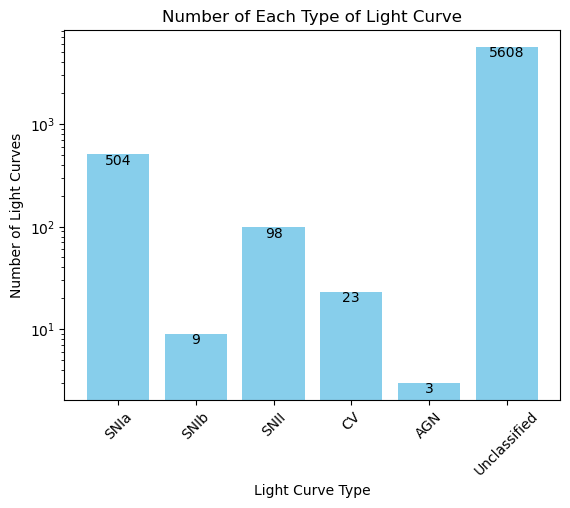

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
delim_whitespace=True
data = pd.read_csv("count_transients.txt", delimiter=r"\s+")

print(data.shape)

# Count the number of light curves that are unclassified
unclassified_count = (data.iloc[:, 6] == "Unclassified").sum()  # Assuming the type is in column 4 (index 3)
print("Number of unclassified light curves:", unclassified_count)

# Count the number of light curves that are SNIa
SNIa_count = (data.iloc[:, 6] == "SNIa").sum()  # Assuming the type is in column 4 (index 3)
print("Number of SNIa light curves:", SNIa_count)

# Count the number of light curves that are SNIb
SNIb_count = (data.iloc[:, 6] == "SNIb").sum()  # Assuming the type is in column 4 (index 3)
print("Number of SNIb light curves:", SNIb_count)

# Count the number of light curves that are SNII
SNII_count = (data.iloc[:, 6] == "SNII").sum()  # Assuming the type is in column 4 (index 3)
print("Number of SNII light curves:", SNII_count)

# Count the number of light curves that are CV
CV_count = (data.iloc[:, 6] == "CV").sum()  # Assuming the type is in column 4 (index 3)
print("Number of CV light curves:", CV_count)

# Count the number of light curves that are AGN
AGN_count = (data.iloc[:, 6] == "AGN").sum()  # Assuming the type is in column 4 (index 3)
print("Number of AGN light curves:", AGN_count)


# Counts for each type of light curve
type_counts = {'SNIa': 504, 'SNIb': 9, 'SNII': 98 ,'CV': 23, 'AGN': 3, 'Unclassified': 5608}

# Extract the types and counts
types = list(type_counts.keys())
counts = list(type_counts.values())

# Plot the histogram
bars = plt.bar(types, counts, color='skyblue')

# Add labels and title
plt.xlabel('Light Curve Type')
plt.ylabel('Number of Light Curves')
plt.title('Number of Each Type of Light Curve')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.yscale('log')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, 0.8 * count, str(count), ha='center')
# Show the plot
plt.show()


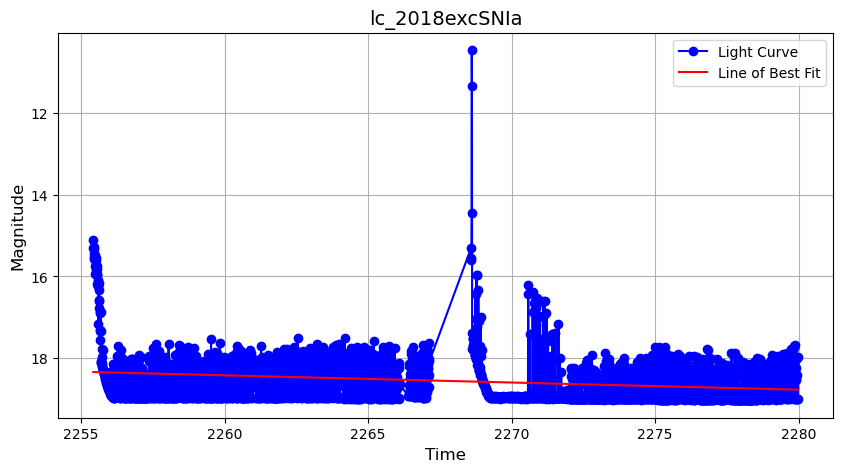

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def plot_light_curve(txt_file, delimiter=r"\s+"):
    # Read the .txt file into a DataFrame
    try:
        df = pd.read_csv(txt_file, delimiter=delimiter, skiprows=2, header=None, usecols=[1,4], names=['Time', 'Magnitude'])
    except pd.errors.EmptyDataError:
        print(f"The file '{txt_file}' is empty.")
        return
    except pd.errors.ParserError:
        print(f"Error parsing '{txt_file}'. Please check the file format.")
        return

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Time'], df['Magnitude'])
    line = slope * df['Time'] + intercept
    
    # Plot the light curve
    plt.figure(figsize=(10, 5))
    plt.plot(df['Time'], df['Magnitude'], marker='o', linestyle='-', color='blue', label='Light Curve')
    plt.plot(df['Time'], line, color='red', label='Line of Best Fit')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.title('lc_2018excSNIa', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.show()

def main():
    # Path to the .txt file
    txt_file = r"C:\Users\nic51\TESS RESEARCH\Extracted_tarballs\sector35\cam1_ccd1\lc_discovery\lc_2021ckj_cleaned.txt"
    # Specify the delimiter used in the .txt file
    delimiter = r"\s+"  # Change this to the appropriate delimiter (e.g., ',', ' ', etc.)
    # Plot the light curve
    plot_light_curve(txt_file, delimiter)

if __name__ == "__main__":
    main()
